In [20]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [21]:
cardio = pd.read_csv('../Data/01-modified-data/cardiovascular_numeric_final.csv')
cardio = cardio.drop(cardio.columns[0], axis=1)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62,110,80,1,1,0,0,1,0,21.97
1,1,55,1,156,85,140,90,3,1,0,0,1,1,34.93
2,2,52,1,165,64,130,70,3,1,0,0,0,1,23.51
3,3,48,2,169,82,150,100,1,1,0,0,1,1,28.71
4,4,48,1,156,56,100,60,1,1,0,0,0,0,23.01


In [22]:
cardio_x = cardio.drop(columns=['cardio','id'])
cardio_y = cardio[['cardio']]
cardio_y = np.ravel(cardio_y)

In [26]:
param_grid = {
    'max_features': [5,8,12,15,30],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 200, 250]
}

In [24]:
x_train, x_test, y_train, y_test = train_test_split(cardio_x, cardio_y, test_size=0.2, random_state=12)

In [28]:
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=4, scoring='accuracy')
grid_search.fit(x_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.787074,0.007200,0.035596,0.000105,3,5,100,"{'max_depth': 3, 'max_features': 5, 'n_estimat...",0.720932,0.722784,0.724173,0.718463,0.721588,0.002139,45
1,1.545514,0.004320,0.069910,0.000647,3,5,200,"{'max_depth': 3, 'max_features': 5, 'n_estimat...",0.720855,0.723092,0.725176,0.718695,0.721954,0.002424,41
2,1.936487,0.015982,0.086350,0.000170,3,5,250,"{'max_depth': 3, 'max_features': 5, 'n_estimat...",0.720932,0.722938,0.724558,0.719080,0.721877,0.002063,43
3,1.064351,0.004957,0.035183,0.000275,3,8,100,"{'max_depth': 3, 'max_features': 8, 'n_estimat...",0.720701,0.723324,0.725330,0.718309,0.721916,0.002652,42
4,2.128837,0.010925,0.070401,0.001423,3,8,200,"{'max_depth': 3, 'max_features': 8, 'n_estimat...",0.720701,0.723170,0.725021,0.717846,0.721684,0.002695,44
5,2.672131,0.016506,0.085684,0.000097,3,8,250,"{'max_depth': 3, 'max_features': 8, 'n_estimat...",0.720701,0.725407,0.725407,0.717614,0.722282,0.003310,40
6,1.451854,0.002488,0.033621,0.000449,3,12,100,"{'max_depth': 3, 'max_features': 12, 'n_estima...",0.722475,0.724327,0.726410,0.719620,0.723208,0.002496,31
7,2.903286,0.002093,0.065900,0.000445,3,12,200,"{'max_depth': 3, 'max_features': 12, 'n_estima...",0.722475,0.724327,0.726410,0.719620,0.723208,0.002496,31
8,3.632230,0.007120,0.081526,0.000799,3,12,250,"{'max_depth': 3, 'max_features': 12, 'n_estima...",0.722475,0.724327,0.726410,0.719620,0.723208,0.002496,31
9,1.452749,0.006278,0.033584,0.000312,3,15,100,"{'max_depth': 3, 'max_features': 15, 'n_estima...",0.722475,0.724327,0.726410,0.719620,0.723208,0.002496,31


Text(0, 0.5, 'accuracy')

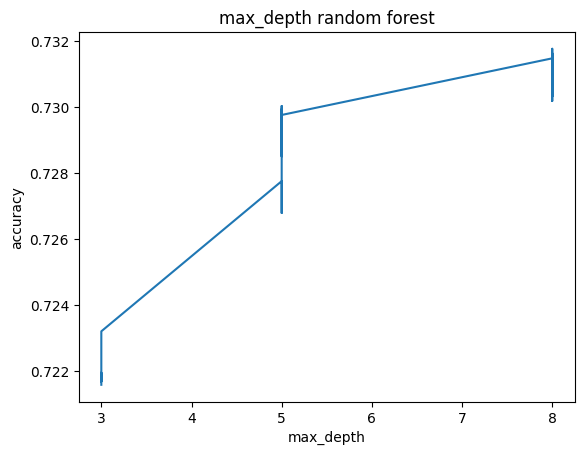

In [41]:
fig, ax = plt.subplots()

# Plotting the data
ax.plot(results['param_max_depth'], results['mean_test_score'])  # Line plot

# Adding title and labels
ax.set_title('max_depth random forest')
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')

Text(0, 0.5, 'accuracy')

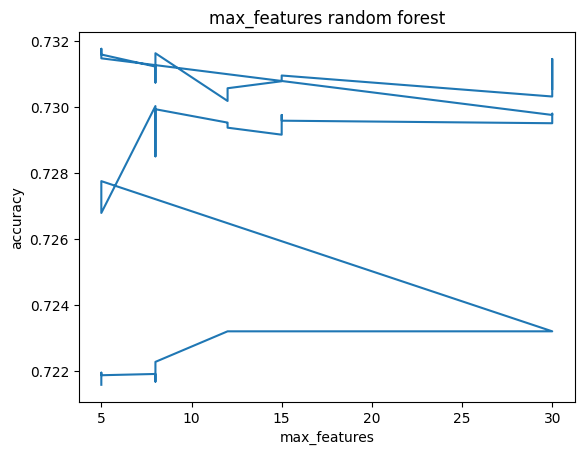

In [42]:
fig, ax = plt.subplots()

# Plotting the data
ax.plot(results['param_max_features'], results['mean_test_score'])  # Line plot

# Adding title and labels
ax.set_title('max_features random forest')
ax.set_xlabel('max_features')
ax.set_ylabel('accuracy')

Text(0, 0.5, 'accuracy')

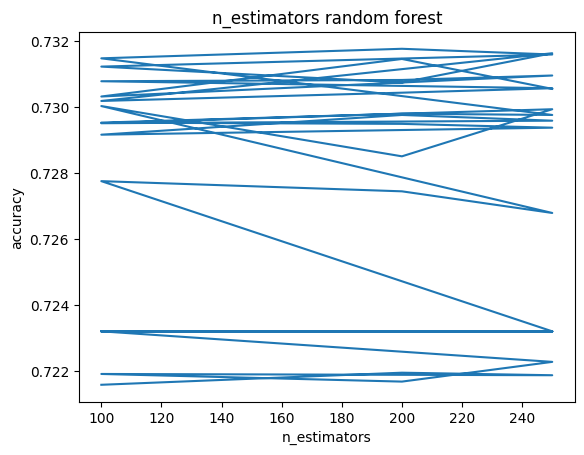

In [43]:
fig, ax = plt.subplots()

# Plotting the data
ax.plot(results['param_n_estimators'], results['mean_test_score'])  # Line plot

# Adding title and labels
ax.set_title('n_estimators random forest')
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')

In [32]:
best_params = grid_search.best_params_
best_params

{'max_depth': 8, 'max_features': 5, 'n_estimators': 200}

In [33]:
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(x_train, y_train)

feature_importances = best_rf_model.feature_importances_


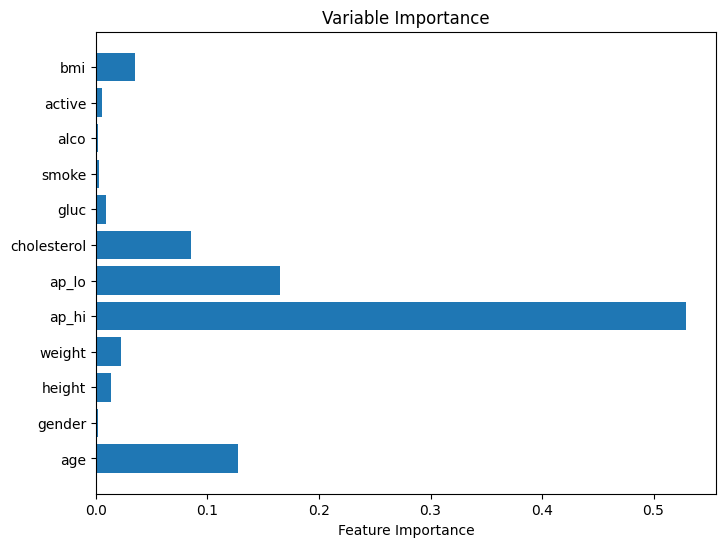

In [34]:
plt.figure(figsize=(8, 6))
plt.barh(x_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Variable Importance')
plt.show()

In [35]:
from sklearn import metrics
def confusion_plot(y_data,y_pred):
    accuracy = metrics.accuracy_score(y_data, y_pred)
    print('ACCURACY:',accuracy)
    precision_0 = metrics.precision_score(y_data, y_pred,pos_label=0)
    recall_0 = metrics.recall_score(y_data, y_pred,pos_label=0)
    print('POSITIVE RECALL (Y=0):',recall_0)
    print('POSITIVE PRECISION (Y=0):',precision_0)
    precision_1 = metrics.precision_score(y_data, y_pred,pos_label=1)
    recall_1 = metrics.recall_score(y_data, y_pred,pos_label=1)
    print('POSITIVE RECALL (Y=1):',recall_1)
    print('POSITIVE PRECISION (Y=1):',precision_1)
    cm = metrics.confusion_matrix(y_data, y_pred, labels=[0,1])
    print(cm)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
    disp.plot()
    plt.show()

In [36]:
yp_train=best_rf_model.predict(x_train)
yp_test=best_rf_model.predict(x_test)

------TRAINING------
ACCURACY: 0.7427667618239333
POSITIVE RECALL (Y=0): 0.8115305932676213
POSITIVE PRECISION (Y=0): 0.7251636919599828
POSITIVE RECALL (Y=1): 0.6686966625265436
POSITIVE PRECISION (Y=1): 0.7671094360435722
[[21818  5067]
 [ 8269 16690]]


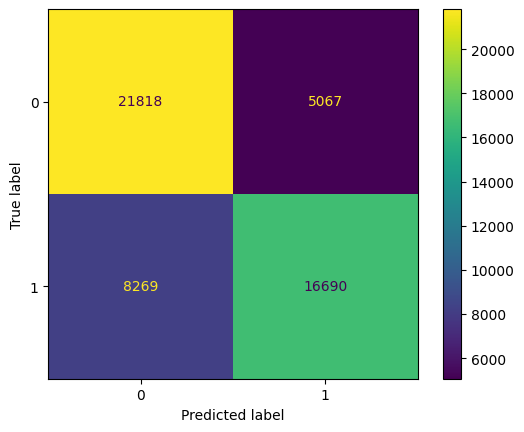

------TEST------
ACCURACY: 0.7316000617188706
POSITIVE RECALL (Y=0): 0.8058876270173342
POSITIVE PRECISION (Y=0): 0.7121352172190677
POSITIVE RECALL (Y=1): 0.6523125996810207
POSITIVE PRECISION (Y=1): 0.7589534236407497
[[5393 1299]
 [2180 4090]]


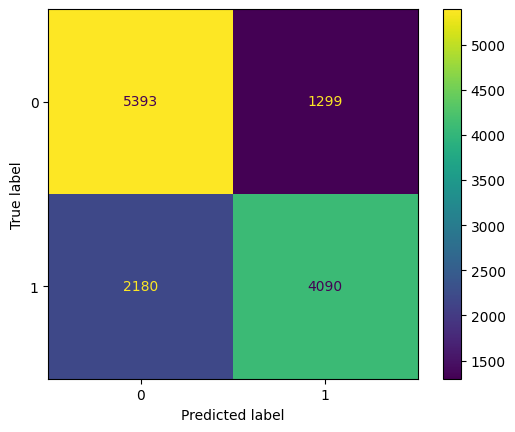

In [37]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)